<a href="https://colab.research.google.com/github/sxudan/imageprocessing/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image segmentation

Image segmentation is the process of partitioning an image into multiple segments or regions based on certain characteristics such as color, intensity, texture, or other higher-level attributes. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

Here's an overview of image segmentation:

Grouping Similar Pixels: Segmentation involves grouping together pixels that share common properties or characteristics. These properties could be intensity levels, color values, texture patterns, or gradients.

Region-Based or Pixel-Based: Segmentation techniques can be region-based or pixel-based. Region-based methods group pixels into larger regions based on similarity criteria, while pixel-based methods segment individual pixels independently.

Clustering Algorithms: Clustering algorithms like K-means clustering, mean-shift clustering, and hierarchical clustering are commonly used for segmentation. These algorithms group pixels into clusters based on feature similarity.

Thresholding: Thresholding is a simple segmentation technique where pixels are classified as belonging to the foreground or background based on a threshold value applied to a particular feature, such as intensity or color.

Edge Detection: Edge-based segmentation methods detect edges or boundaries between different regions in the image. Techniques like the Canny edge detector or gradient-based methods identify abrupt changes in intensity or color, which often correspond to object boundaries.

Watershed Transformation: The Watershed algorithm is a powerful tool for segmenting objects in images where the boundaries between objects are not well-defined. It simulates flooding from marked points to segment the image into regions.

Deep Learning: With the rise of deep learning, convolutional neural networks (CNNs) have been widely used for image segmentation tasks. Architectures like U-Net, FCN (Fully Convolutional Networks), and Mask R-CNN are commonly used for semantic segmentation, instance segmentation, and more.

Applications: Image segmentation has numerous applications in various fields, including medical imaging (e.g., tumor detection, organ segmentation), autonomous driving (e.g., object detection, lane segmentation), satellite imaging, image compression, and more.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import PIL

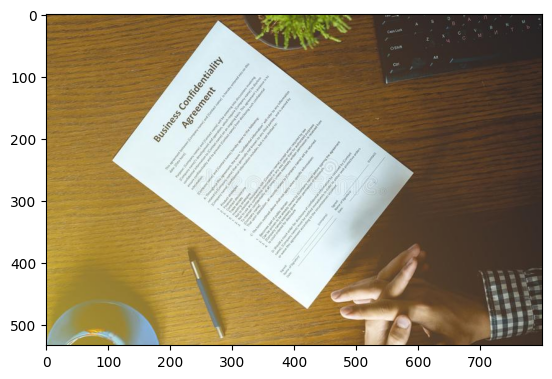

In [2]:
image = PIL.Image.open(requests.get('https://source.roboflow.com/yncbIbOLVQgUJ7KM8B8nAfedWnu2/GcBi8q9MobvRJIjF4XFJ/original.jpg', stream=True).raw)
image = np.array(image)
plt.imshow(image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7b9d26d08a90>)

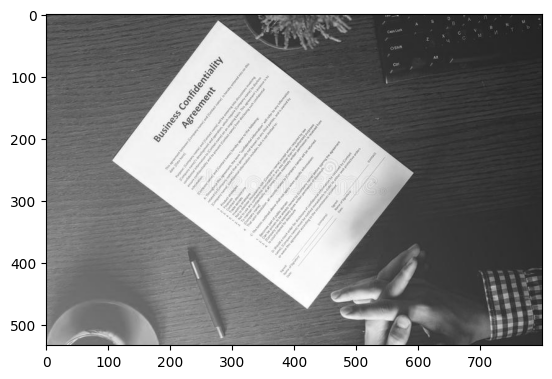

In [14]:
w,h  = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(111), plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Apply Otsu's thresholding to separate foreground and background

(<Axes: >, <matplotlib.image.AxesImage at 0x7b9d24901ea0>)

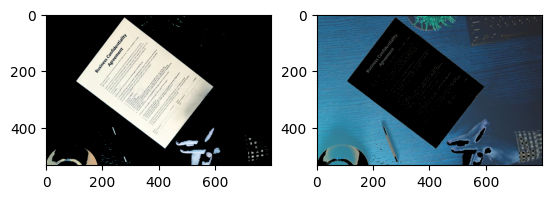

In [56]:

_, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the binary mask to get the foreground region
foreground = cv2.bitwise_and(image, image, mask=binary_mask)

# Invert the binary mask again to get the background region
background = cv2.bitwise_and(image, image, mask=~binary_mask)


plt.subplot(121), plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))

plt.subplot(122), plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

## Simple edge detection

(<Axes: >, <matplotlib.image.AxesImage at 0x7b9d269443a0>)

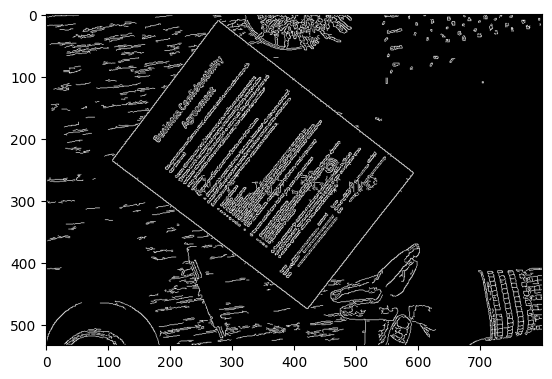

In [15]:
edges = cv2.Canny(gray, 50, 150)

plt.subplot(111), plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

## Conversion from polar to rectangular coordinates

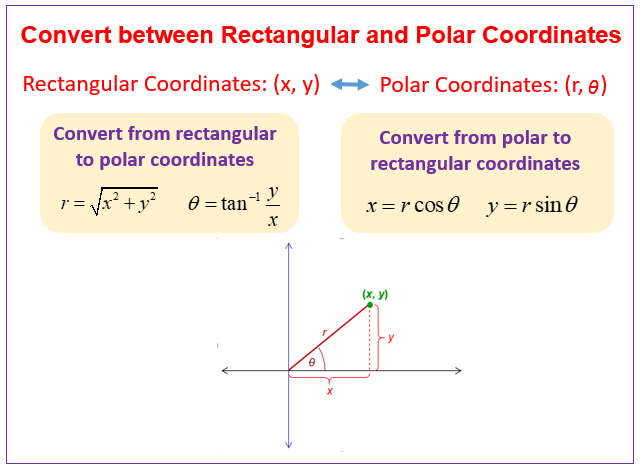

x1 = x0 + offset * (-sin(theta))

y1 = y0 + offset * (cos(theta))

(<Axes: >, <matplotlib.image.AxesImage at 0x7b9d25379420>)

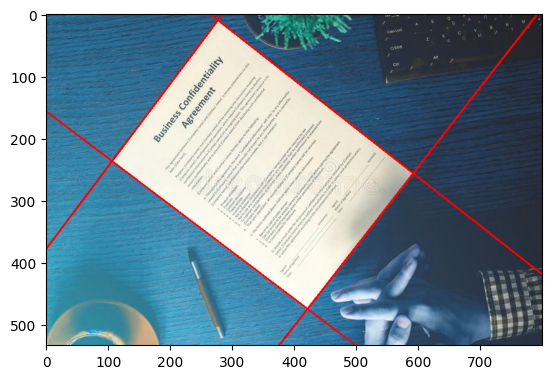

In [38]:
image_duplicate = np.copy(image)
# Apply Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=200)

# Draw detected lines on the original image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_duplicate, (x1, y1), (x2, y2), (0, 0, 255), 2)


plt.subplot(111), plt.imshow(cv2.cvtColor(image_duplicate, cv2.COLOR_BGR2RGB))


## Find intersection

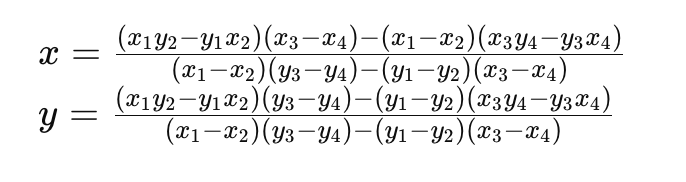

In [62]:
def find_intersection(line1, line2):
    x1, y1, x2, y2 = line1.T
    x3, y3, x4, y4 = line2.T
    denom = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    intersection_points = np.array([((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4)) / denom,
                                    ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4)) / denom]).T
    return intersection_points

In [108]:
def isParallel(line1, line2):
  x1, y1, x2, y2 = line1.T
  x3, y3, x4, y4 = line2.T
  m1 = (y2-y1)/(x2-x1)
  m2 = (y4-y3)/(x4-x3)
  tolerance = 0.05
  flag = abs(m1-m2) < tolerance
  return flag

In [109]:
def isPerpendicular(line1, line2):
  x1, y1, x2, y2 = line1.T
  x3, y3, x4, y4 = line2.T
  m1 = (y2-y1)/(x2-x1)
  m2 = (y4-y3)/(x4-x3)
  tolerance = 0.1
  total = m1*m2
  flag = (total + 1) < tolerance
  return flag

## Find corners using Hough Transform

592.4854279450584 257.3795713838307
276.81143314812033 10.544142430461697
422.13696539091336 475.1030501512586
106.03849138600032 237.27657923327644


(<Axes: >, <matplotlib.image.AxesImage at 0x7b9d716be650>)

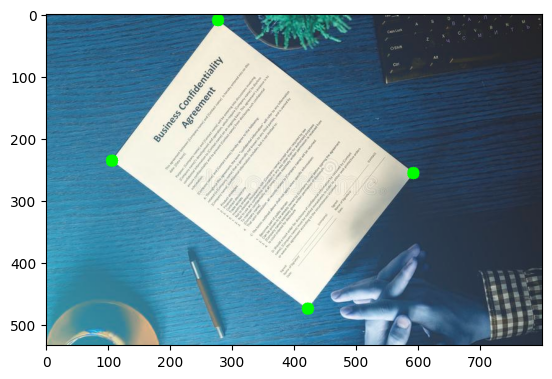

In [124]:
image_duplicate_1 = np.copy(image)
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=200, minLineLength=100, maxLineGap=10)

# Find intersection points of lines
intersection_points = []
if lines is not None:
    for i in range(len(lines)):
        for j in range(i+1, len(lines)):
            x1, y1, x2, y2 = lines[i][0]
            x3, y3, x4, y4 = lines[j][0]
            if not isParallel(lines[i], lines[j]):
              intersect = find_intersection(lines[i], lines[j])
              intersection_points.append(intersect)

# Draw corners on the image
for corner in intersection_points:
    x, y = corner.ravel()
    cv2.circle(image_duplicate_1, (round(x), round(y)), 10, (0, 255, 0), -1)
    print(x,y)


plt.subplot(111), plt.imshow(cv2.cvtColor(image_duplicate_1, cv2.COLOR_BGR2RGB))


## Perspective Transformation

[[592.4854   257.37958 ]
 [276.81143   10.544143]
 [422.13696  475.10306 ]
 [106.03849  237.27658 ]]


(<Axes: >, <matplotlib.image.AxesImage at 0x7b9d1f5235e0>)

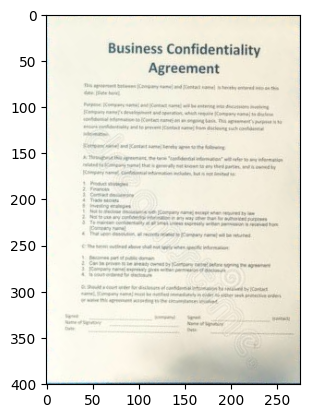

In [142]:
import math

corners = [corner.ravel() for corner in intersection_points]
src_pts = np.float32(corners)


bottom_r = src_pts[0]
top_r = src_pts[1]
bottom_l = src_pts[2]
top_l = src_pts[3]

cardH= round(math.sqrt(pow(bottom_r[0]-top_r[0],2) + pow(bottom_r[1]-top_r[1],2)))
cardW= round(math.sqrt(pow(bottom_r[0]-bottom_l[0],2) + pow(bottom_r[1]-bottom_l[1],2)));
dst_pts = np.float32([[cardW-1, cardH-1], [cardW-1, 0],[0, cardH-1], [0, 0]])



# Perform perspective transformation in one line
warped_image = cv2.warpPerspective(image, cv2.getPerspectiveTransform(src_pts, dst_pts), (cardW, cardH))

plt.subplot(111), plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))